In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('pv_case_reports.csv')

# Explore the data
print(data.head())
print(data.info())
print(data.describe())


   Case_ID Report_Date  Patient_Age  Gender Medication Adverse_Event  \
0        1  2023-01-01         30.0    Male       MedA      Headache   
1        2  2023-01-05         45.0  Female       MedB        Nausea   
2        3  2023-01-10          NaN  Female        NaN     Dizziness   
3        4  2023-01-15         23.0    Male       MedD           NaN   
4        5  2023-01-20         40.0  Female       MedE       Fatigue   

  Severity_Level        Outcome  Missing_Info  Unusual_Symptoms  
0           Mild      Recovered         False               NaN  
1       Moderate       Improved         False               NaN  
2         Severe  Not Recovered          True               NaN  
3           Mild      Recovered          True               NaN  
4            NaN       Improved          True               NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            

In [5]:
import pandas as pd

# Load your dataset (assuming you have it in 'pv_case_data.csv')
df = pd.read_csv('pv_case_data.csv')

# Step 1: Handle Missing Values
# Fill missing Patient_Age with the mean
df['Patient_Age'] = df['Patient_Age'].fillna(df['Patient_Age'].mean())

# Fill missing Medication with the most frequent value
df['Medication'] = df['Medication'].fillna(df['Medication'].mode()[0])

# Fill missing Adverse_Event and Severity_Level with the most frequent value
df['Adverse_Event'] = df['Adverse_Event'].fillna(df['Adverse_Event'].mode()[0])
df['Severity_Level'] = df['Severity_Level'].fillna(df['Severity_Level'].mode()[0])

# For Unusual_Symptoms, we already created a binary feature
df['Unusual_Symptoms'] = df['Unusual_Symptoms'].isnull().astype(int)

# Check the cleaned data
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Case_ID           5 non-null      int64  
 1   Report_Date       5 non-null      object 
 2   Patient_Age       5 non-null      float64
 3   Gender            5 non-null      object 
 4   Medication        5 non-null      object 
 5   Adverse_Event     5 non-null      object 
 6   Severity_Level    5 non-null      object 
 7   Outcome           5 non-null      object 
 8   Missing_Info      2 non-null      object 
 9   Unusual_Symptoms  5 non-null      int32  
dtypes: float64(1), int32(1), int64(1), object(7)
memory usage: 512.0+ bytes
None
        Case_ID  Patient_Age  Unusual_Symptoms
count  5.000000     5.000000          5.000000
mean   3.000000    47.500000          0.400000
std    1.581139    11.456439          0.547723
min    1.000000    30.000000          0.000000
25%    2.000000   

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame creation (assuming you have the DataFrame `df` already)
# If you have not already done so, load your DataFrame here
# df = pd.read_csv('your_data_file.csv')  # Load your data

# Step 1: Fill missing values in Missing_Info and encode it
df['Missing_Info'] = df['Missing_Info'].fillna(0)  # Assuming 0 means no missing info
df['Missing_Info'] = df['Missing_Info'].replace({'0': 0, '1': 1}).astype(int)

# Step 2: Feature Selection
X = df[['Patient_Age', 'Gender', 'Medication', 'Adverse_Event', 'Severity_Level', 'Unusual_Symptoms']]
y = df['Missing_Info']

# Step 3: Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate Model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\saik7\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saik7\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saik7\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saik7\anaconda3\Lib\site-packages\sklea

In [19]:
# Check the class distribution
print(df['Missing_Info'].value_counts())


Missing_Info
0    3
1    2
Name: count, dtype: int64


In [21]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['Missing_Info'] == 0]
df_minority = df[df['Missing_Info'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                   replace=True,     # Sample with replacement
                                   n_samples=len(df_majority),    # To match majority class
                                   random_state=42) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Check new class distribution
print(df_upsampled['Missing_Info'].value_counts())


Missing_Info
0    3
1    3
Name: count, dtype: int64


In [23]:
# Use df_upsampled for your features and target
X = df_upsampled[['Patient_Age', 'Gender', 'Medication', 'Adverse_Event', 'Severity_Level', 'Unusual_Symptoms']]
y = df_upsampled['Missing_Info']

# Continue with the rest of your model training code...


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming df_upsampled is already created and contains balanced classes

# Step 1: Encoding Categorical Features
# Initialize the LabelEncoder
label_encoders = {}
categorical_columns = ['Gender', 'Medication', 'Adverse_Event', 'Severity_Level']

for col in categorical_columns:
    le = LabelEncoder()
    df_upsampled[col] = le.fit_transform(df_upsampled[col])
    label_encoders[col] = le

# Step 2: Prepare Features and Target Variable
X = df_upsampled[['Patient_Age', 'Gender', 'Medication', 'Adverse_Event', 'Severity_Level', 'Unusual_Symptoms']]
y = df_upsampled['Missing_Info']

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the Model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\Users\saik7\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saik7\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saik7\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saik7\anaconda3\Lib\site-packages\sklea

In [29]:
print(y.value_counts())


Missing_Info
0    3
1    3
Name: count, dtype: int64


In [31]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the resulting datasets
print(f"Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}")


Training set shape: (4, 6), Testing set shape: (2, 6)


In [33]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Print the model
print(model)


RandomForestClassifier(random_state=42)


In [35]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the predictions
print("Predictions:", y_pred)


Predictions: [1 0]


In [37]:
from sklearn.metrics import classification_report, confusion_matrix

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
 [[1 0]
 [0 1]]


In [39]:
import pandas as pd
import numpy as np

# Get feature importance
feature_importance = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


            Feature  Importance
0       Patient_Age    0.264368
3     Adverse_Event    0.219668
1            Gender    0.199234
2        Medication    0.125798
4    Severity_Level    0.106003
5  Unusual_Symptoms    0.084930


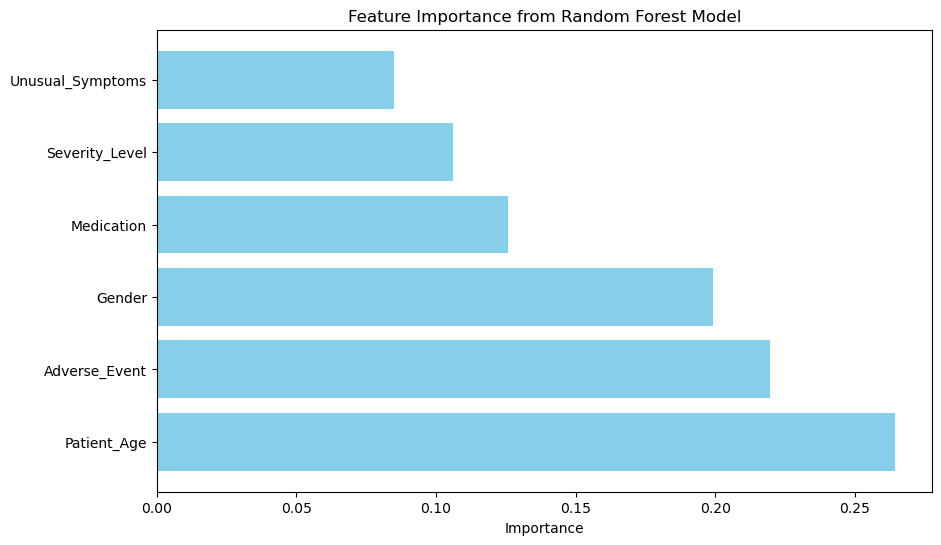

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest Model')
plt.show()


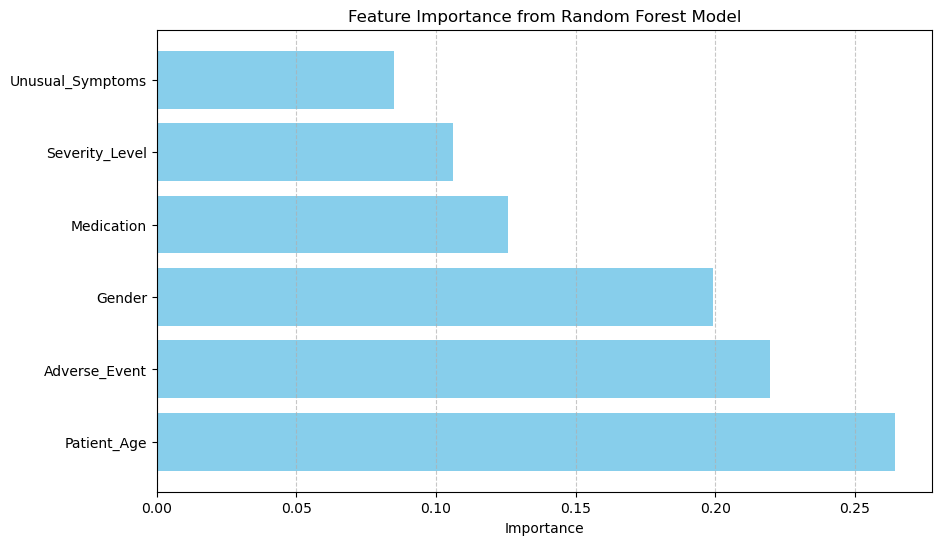

In [43]:
import matplotlib.pyplot as plt

# Assuming you have the importance_df DataFrame from the previous steps
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [47]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=3)  # 5-fold cross-validation

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.5 0.5 1. ]
Mean Cross-Validation Score: 0.6666666666666666


In [51]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X, y)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score: 0.6666666666666666


In [53]:
# Initialize Random Forest with best parameters
best_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Fit the model on the training set
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
 [[1 0]
 [0 1]]


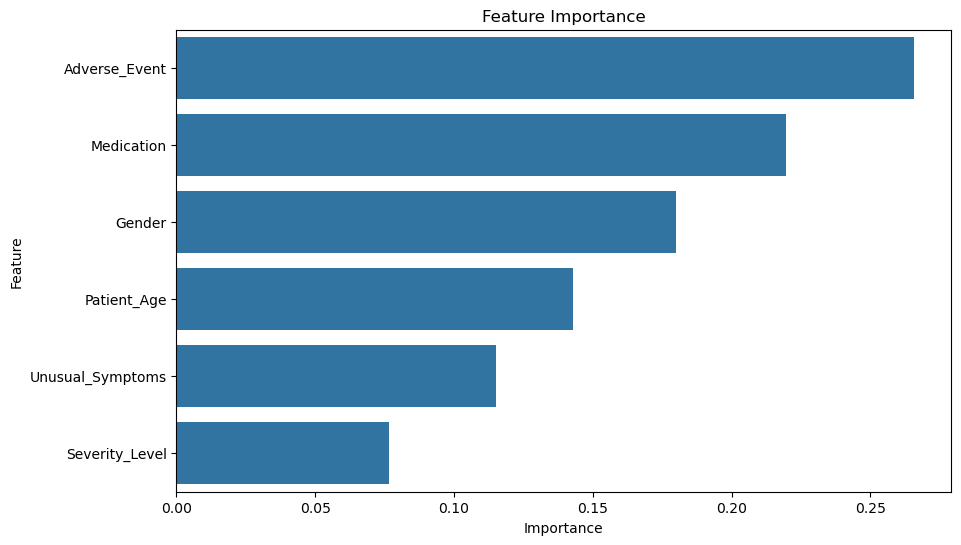

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


In [67]:
import joblib

# Save the model
joblib.dump(model, 'model.pkl')


['model.pkl']

In [71]:
import pandas as pd
import joblib

# Sample input data for PV case reports
input_data = {
    'Patient_Age': [30, 45, 60, 25, 70],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female'],
    'Medication': ['MedA', 'MedB', 'MedC', 'MedA', 'MedC'],
    'Adverse_Event': ['Nausea', 'Headache', 'Dizziness', 'Nausea', 'Fatigue'],
    'Severity_Level': ['Mild', 'Moderate', 'Severe', 'Mild', 'Moderate'],
    'Unusual_Symptoms': [0, 1, 0, 1, 0]
}

# Convert the input data into a DataFrame
df_input = pd.DataFrame(input_data)

# Load the model and get the feature names used during training
model = joblib.load('model.pkl')

# Preprocess the input data (match with training preprocessing)
df_input['Gender'] = df_input['Gender'].replace({'Male': 1, 'Female': 0})  # Simple encoding
df_input = pd.get_dummies(df_input, columns=['Medication', 'Adverse_Event', 'Severity_Level'], drop_first=True)

# Align the columns to match those seen during training
# Assume 'feature_names' is a list of the feature names used during training
feature_names = model.feature_names_in_  # Get feature names from the trained model

# Reindex the DataFrame to ensure it has the same columns
df_input = df_input.reindex(columns=feature_names, fill_value=0)

# Make predictions using the preprocessed input data
predictions = model.predict(df_input)

# Add predictions to the DataFrame
df_input['Missing_Info'] = predictions

# Display the results
print("Input Data with Predictions:")
print(df_input)


Input Data with Predictions:
   Patient_Age  Unusual_Symptoms  Gender_M  Medication_Drug_B  \
0           30                 0         0                  0   
1           45                 1         0                  0   
2           60                 0         0                  0   
3           25                 1         0                  0   
4           70                 0         0                  0   

   Medication_Drug_C  Adverse_Event_Headache  Adverse_Event_Nausea  \
0                  0                   False                  True   
1                  0                    True                 False   
2                  0                   False                 False   
3                  0                   False                  True   
4                  0                   False                 False   

   Adverse_Event_Skin Rash  Severity_Level_Low  Severity_Level_Medium  \
0                        0                   0                      0   
1            

C:\Users\saik7\AppData\Local\Temp\ipykernel_32392\41174123.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_input['Gender'] = df_input['Gender'].replace({'Male': 1, 'Female': 0})  # Simple encoding
